In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [2]:
genes = ["gen"+str(i) for i in range(1,101)]
wt = ["wt"+str(i) for i in range(1,6)]
ko = ["ko"+str(i) for i in range(1,6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [3]:
for gene in data.index:
    data.loc[gene,"wt1":"wt5"] = np.random.poisson(lam = rd.randrange(10,1000),size = 5)
    data.loc[gene,"ko1":"ko5"] = np.random.poisson(lam = rd.randrange(10,1000),size = 5)

In [4]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gen1,88,94,91,78,88,901,858,915,875,940
gen2,1032,947,1011,970,975,655,673,703,629,687
gen3,443,441,435,434,415,161,195,190,164,187
gen4,353,344,364,362,350,18,19,25,32,26
gen5,519,512,460,537,511,89,90,91,83,87


In [5]:
scaled_data = preprocessing.scale(data.T)

In [6]:
pca = PCA()
pca.fit(scaled_data)
pca_datd = pca.transform(scaled_data)

In [7]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ["PC"+str(x) for x in range(1,len(per_var)+1)]

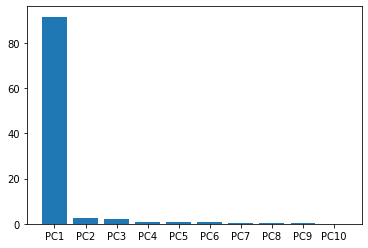

In [9]:
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.show()